In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# https://www.kaggle.com/datasets/chavindudulaj/vehicle-maintenance-data
data = pd.read_csv('vehicle_maintenance_data.csv')

In [5]:
data.head()

,Vehicle_Model,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Last_Service_Date,Warranty_Expiry_Date,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance
0,Truck,58765,Good,0,4,Electric,Automatic,2000,28524,2023-11-23,2025-06-24,Second,20782,6,3,13.622204,New,New,Weak,1
1,Van,60353,Average,1,7,Electric,Automatic,2500,133630,2023-09-21,2025-06-04,Second,23489,7,0,13.625307,New,New,Weak,1
2,Bus,68072,Poor,0,2,Electric,Automatic,1500,34022,2023-06-27,2025-04-27,First,17979,7,0,14.306302,New,Good,Weak,1
3,Bus,60849,Average,4,5,Petrol,Automatic,2500,81636,2023-08-24,2025-11-05,Second,6220,7,3,18.709467,New,Worn Out,New,1
4,Bus,45742,Poor,5,1,Petrol,Manual,2000,97162,2023-05-25,2025-09-14,Third,16446,6,2,16.977482,Good,Good,Weak,1


In [6]:
data.columns

Index(['Vehicle_Model', 'Mileage', 'Maintenance_History', 'Reported_Issues',
       'Vehicle_Age', 'Fuel_Type', 'Transmission_Type', 'Engine_Size',
       'Odometer_Reading', 'Last_Service_Date', 'Warranty_Expiry_Date',
       'Owner_Type', 'Insurance_Premium', 'Service_History',
       'Accident_History', 'Fuel_Efficiency', 'Tire_Condition',
       'Brake_Condition', 'Battery_Status', 'Need_Maintenance'],
      dtype='object')

In [7]:
data.groupby('Vehicle_Model').size()

Vehicle_Model
Bus           8414
Car           8203
Motorcycle    8295
SUV           8360
Truck         8328
Van           8400
dtype: int64

In [8]:
truck = data[data['Vehicle_Model'] == 'Truck']

In [9]:
truck.head()

,Vehicle_Model,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Last_Service_Date,Warranty_Expiry_Date,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance
0,Truck,58765,Good,0,4,Electric,Automatic,2000,28524,2023-11-23,2025-06-24,Second,20782,6,3,13.622204,New,New,Weak,1
5,Truck,31653,Average,2,1,Diesel,Automatic,800,70954,2023-08-12,2024-09-05,Third,16813,5,3,15.954422,Worn Out,Good,New,0
33,Truck,37777,Poor,4,5,Electric,Automatic,800,127740,2023-08-19,2024-05-22,Second,8425,8,3,17.213328,Worn Out,New,Good,1
35,Truck,55518,Poor,4,8,Diesel,Automatic,2000,19685,2023-12-31,2024-11-19,First,16488,2,3,16.367697,New,Worn Out,Weak,1
36,Truck,48586,Average,2,10,Diesel,Manual,800,37758,2023-08-31,2025-09-29,Third,22244,10,2,16.369858,Good,Good,New,1


In [10]:
# Removing columns not needed
columns_drop = ["Insurance_Premium", "Owner_Type", "Warranty_Expiry_Date", "Vehicle_Model"]

truck_filtered = truck.drop(columns=columns_drop)

In [11]:
truck_filtered.head()

,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Last_Service_Date,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance
0,58765,Good,0,4,Electric,Automatic,2000,28524,2023-11-23,6,3,13.622204,New,New,Weak,1
5,31653,Average,2,1,Diesel,Automatic,800,70954,2023-08-12,5,3,15.954422,Worn Out,Good,New,0
33,37777,Poor,4,5,Electric,Automatic,800,127740,2023-08-19,8,3,17.213328,Worn Out,New,Good,1
35,55518,Poor,4,8,Diesel,Automatic,2000,19685,2023-12-31,2,3,16.367697,New,Worn Out,Weak,1
36,48586,Average,2,10,Diesel,Manual,800,37758,2023-08-31,10,2,16.369858,Good,Good,New,1


(array([811., 869., 757., 881., 827., 813., 822., 831., 892., 825.]),
 array([30001. , 35000.9, 40000.8, 45000.7, 50000.6, 55000.5, 60000.4,
        65000.3, 70000.2, 75000.1, 80000. ]),
 <BarContainer object of 10 artists>)

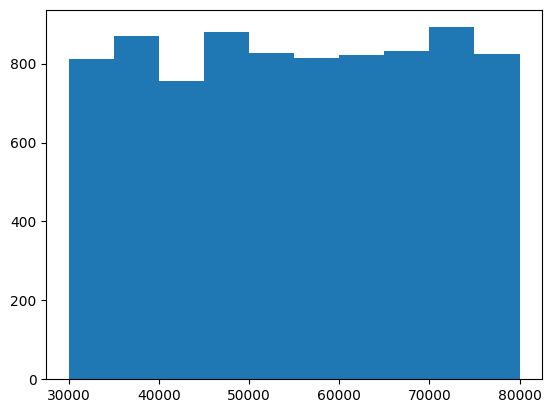

In [12]:
# Plotting the data
# Distribution of the mileage
plt.hist(truck_filtered['Mileage'])


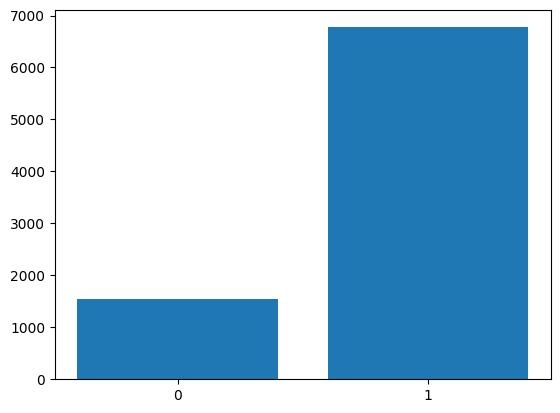

In [13]:
# Split for the Need_Maintenance 
split = truck_filtered.groupby('Need_Maintenance').size()
classes = list(split.index)
values = list(split.values)
plt.bar(classes, values)
plt.xticks(classes)
plt.show()

There is a large number of trucks needed to be sent for maintenance, therefore we need to balance the dataset.

In [14]:
num_cols = len(truck_filtered.columns)
num_cols

16

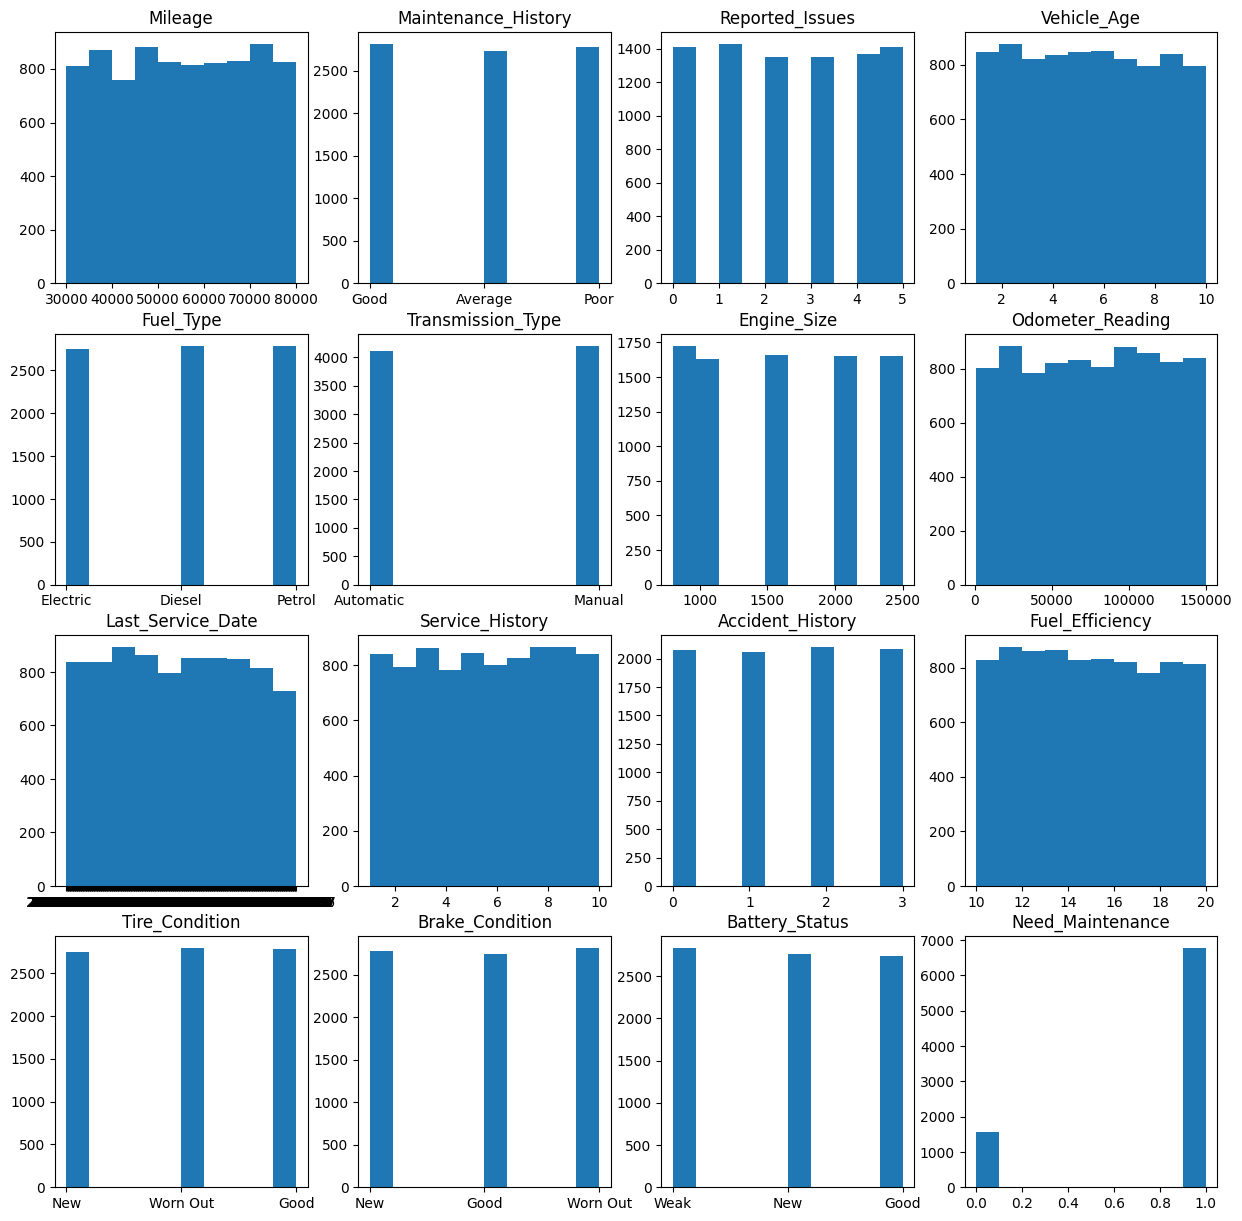

In [15]:
# subplot all the distribution of the attributes
ax, fig = plt.subplots(4, 4, figsize=(15, 15))
for i, col in enumerate(truck_filtered.columns):
    plt.subplot(4, 4, i+1)
    plt.hist(truck_filtered[col])
    plt.title(col)


In [16]:
# Preprocess the categorical data
CATEGORICAL_COLUMNS = ['Fuel_Type', 'Transmission_Type']
MAPPING_COLUMNS = ['Maintenance_History', 'Tire_Condition', 'Brake_Condition', 'Battery_Status']

for col in CATEGORICAL_COLUMNS + MAPPING_COLUMNS:
    print(col)
    print(truck_filtered[col].unique())

Fuel_Type
['Electric' 'Diesel' 'Petrol']
Transmission_Type
['Automatic' 'Manual']
Maintenance_History
['Good' 'Average' 'Poor']
Tire_Condition
['New' 'Worn Out' 'Good']
Brake_Condition
['New' 'Good' 'Worn Out']
Battery_Status
['Weak' 'New' 'Good']


In [17]:
# Create mapping for certain columsn
maintenance_mapping = {'Poor': 0, 'Average': 1, 'Good': 2}
tire_condition_mapping = {'Worn Out': 0, 'Good': 1, 'New': 2}
brake_condition_mapping = {'Worn Out': 0, 'Good': 1, 'New': 2}
battery_status_mapping = {'Weak': 0, 'Good': 1, 'New': 2}

truck_filtered['Maintenance_History'] = truck_filtered['Maintenance_History'].map(maintenance_mapping)
truck_filtered['Tire_Condition'] = truck_filtered['Tire_Condition'].map(tire_condition_mapping)
truck_filtered['Brake_Condition'] = truck_filtered['Brake_Condition'].map(brake_condition_mapping)
truck_filtered['Battery_Status'] = truck_filtered['Battery_Status'].map(battery_status_mapping)

for col in CATEGORICAL_COLUMNS + MAPPING_COLUMNS:
    # Convert the column to category
    truck_filtered[col] = truck_filtered[col].astype('category').cat.codes

    

In [18]:
# Process data column
truck_filtered['Last_Service_Date'] = pd.to_datetime(truck_filtered['Last_Service_Date'])

In [19]:
# Find max and min of the date
max_date = truck_filtered['Last_Service_Date'].max()
min_date = truck_filtered['Last_Service_Date'].min()

print(max_date, min_date)

2024-02-28 00:00:00 2023-03-30 00:00:00


In [20]:
# Convert to delta days from today
truck_filtered['Last_Service_Date'] = (max_date - truck_filtered['Last_Service_Date']).dt.days

In [21]:
truck_filtered.head()

,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Last_Service_Date,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance
0,58765,2,0,4,1,0,2000,28524,97,6,3,13.622204,2,2,0,1
5,31653,1,2,1,0,0,800,70954,200,5,3,15.954422,0,1,2,0
33,37777,0,4,5,1,0,800,127740,193,8,3,17.213328,0,2,1,1
35,55518,0,4,8,0,0,2000,19685,59,2,3,16.367697,2,0,0,1
36,48586,1,2,10,0,1,800,37758,181,10,2,16.369858,1,1,2,1


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Splitting the data
X = truck_filtered.drop(columns=['Need_Maintenance'])
y = truck_filtered['Need_Maintenance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Testing the model
model.score(X_test_scaled, y_test)


0.8937575030012005

In [23]:
# Give more weight to the minority class
model = LogisticRegression(class_weight='balanced')
model.fit(X_train_scaled, y_train)
model.score(X_test_scaled, y_test)

0.8517406962785115

In [24]:
# Using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)
model.score(X_test_scaled, y_test)

0.8565426170468188

In [25]:
# Using decision tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train_scaled, y_train)
tree.score(X_test_scaled, y_test)

1.0

In [26]:
# Get matrics for the model
from sklearn.metrics import classification_report

y_pred = tree.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       323
           1       1.00      1.00      1.00      1343

    accuracy                           1.00      1666
   macro avg       1.00      1.00      1.00      1666
weighted avg       1.00      1.00      1.00      1666



In [27]:
print("The max depth of the tree is: ", tree.get_depth())

The max depth of the tree is:  7


In [28]:
# Using max depth of 3
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train_scaled, y_train)
tree.score(X_test_scaled, y_test)

0.9261704681872749

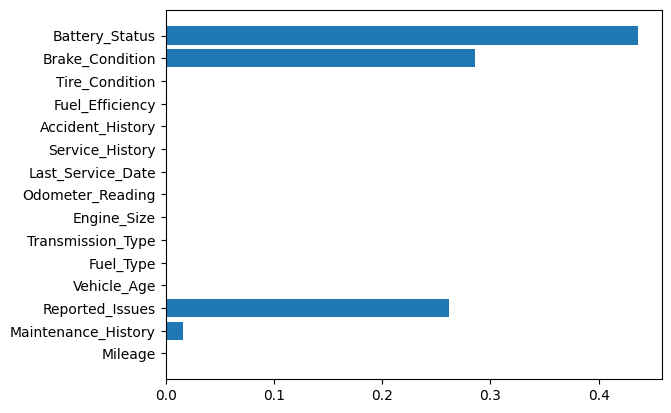

In [29]:
# plot feature importance horizontal bar
importance = tree.feature_importances_
plt.barh(X.columns, importance)
plt.show()

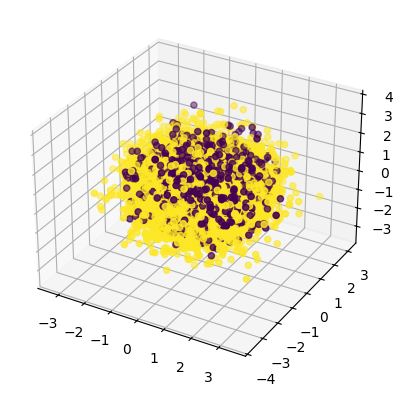

In [33]:
# Import PCA to reduce dimensionality to plot on graph

from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_train_scaled)

# Plot 3D data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_train)
